Number male: 148
Number female: 140
-----------------------------------------------------
Average salary of men 91551.96621621621
Average salary of women 74419.85714285714
-----------------------------------------------------
Average tenure of men 17.466216216216218
Average tenure of women 12.571428571428571
-----------------------------------------------------


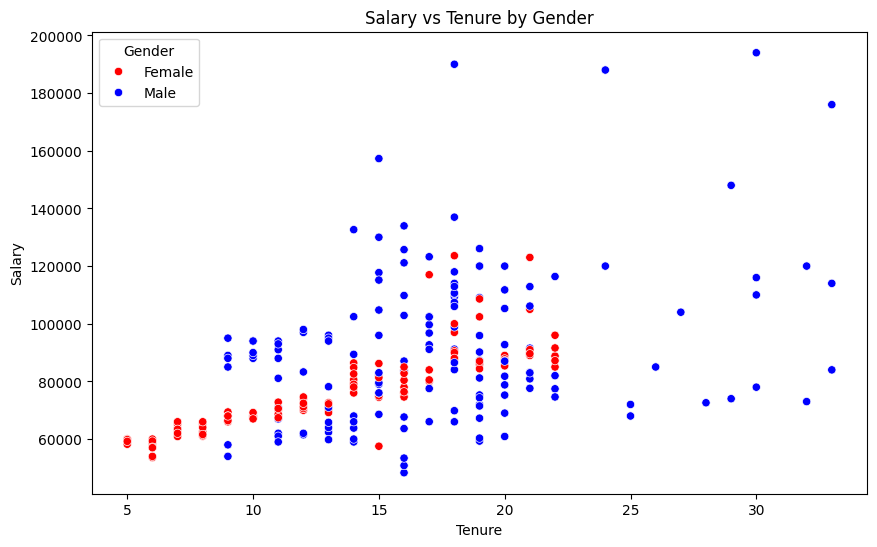

Correlation: 
             EMPLOYEE ID    SALARY    TENURE    GENDER
EMPLOYEE ID     1.000000  0.010427  0.061238  0.054882
SALARY          0.010427  1.000000  0.548666  0.373784
TENURE          0.061238  0.548666  1.000000  0.423147
GENDER          0.054882  0.373784  0.423147  1.000000
-----------------------------------------------------
Linear regression for all the data
                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     68.76
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           4.30e-25
Time:                        19:58:34   Log-Likelihood:                -3243.3
No. Observations:                 288   AIC:                             6493.
Df Residuals:                     285   BIC:                         

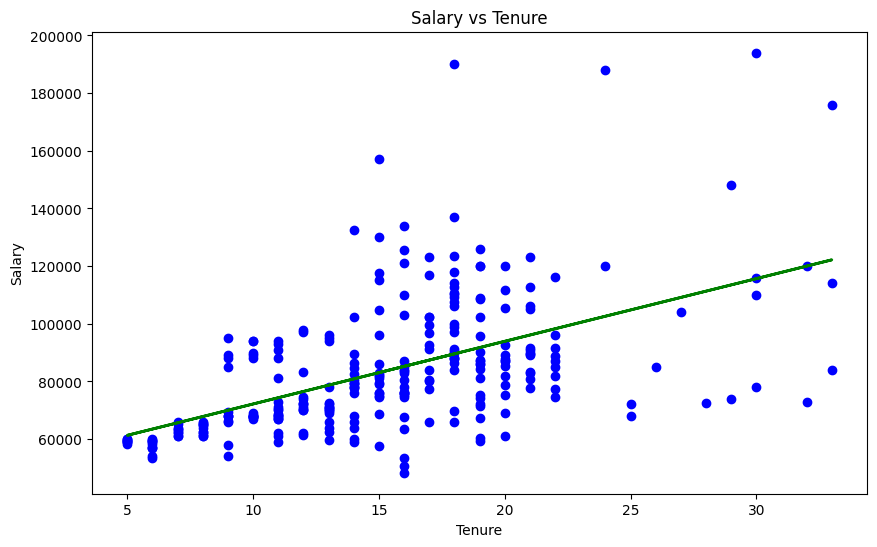

-----------------------------------------------------
Linear regression with Tenure, Gender and TENUBE_GENDER
                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     47.45
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           6.87e-25
Time:                        19:58:35   Log-Likelihood:                -3241.5
No. Observations:                 288   AIC:                             6491.
Df Residuals:                     284   BIC:                             6506.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Load the data
df = pd.read_csv('gender (Norwegian).csv', delimiter=';')

# drop the columns Unnamed:x startinf from 4 untul 8
df = df.drop(df.columns[4:9], axis=1)

# Convert GENDER to a binary variable 0 for Female and 1 for Male
df['GENDER'] = df['GENDER'].map({'Female': 0, 'Male': 1})

# how many man and woman are there
man_count = df['GENDER'].value_counts()[1]
female_count = df['GENDER'].value_counts()[0]

print(f"Number male: " + str(man_count))
print(f"Number female: " + str(female_count))

# delim in print
print("-----------------------------------------------------")

# Avarega salary of man and veoman
average_salary = df.groupby("GENDER")["SALARY"].mean()

man_salary = average_salary[1]
woman_salary = average_salary[0]

print(f"Average salary of men " + str(man_salary))
print(f"Average salary of women " + str(woman_salary))

print("-----------------------------------------------------")

#AVarage tenure of man and women
average_ten = df.groupby("GENDER")["TENURE"].mean()

man_tenure = average_ten[1]
woman_tenure = average_ten[0]

print(f"Average tenure of men " + str(man_tenure))
print(f"Average tenure of women " + str(woman_tenure))

# delim in print
print("-----------------------------------------------------")

# Create a mapping for gender
gender_map = {0: 'Female', 1: 'Male'}

# Replace numeric values with string labels
tmp_df = df.copy()

tmp_df['GENDER_LABEL'] = df['GENDER'].map(gender_map)

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tmp_df, x='TENURE', y='SALARY', hue='GENDER_LABEL', palette={'Female': 'red', 'Male': 'blue'})
plt.title('Salary vs Tenure by Gender')
plt.xlabel('Tenure') # not needed makes it not all CAPS
plt.ylabel('Salary') # not needed makes it not all CAPS
plt.legend(title='Gender', loc='best')
plt.show()

# all the coleration
correlation = df.corr()
print(f"Correlation: ")
print(correlation)

# delim in print
print("-----------------------------------------------------")
print("Linear regression for all the data")
# linear regression salary vs gender and tenure
X = df[['GENDER', 'TENURE']]
Y = df['SALARY']

X = sm.add_constant(X)

model_general = sm.OLS(Y, X).fit()

print(model_general.summary())

# delim in print
print("-----------------------------------------------------")
print("Linear regression with Tenure")
# linear regression salary vs tenure
X = df[['TENURE']]
Y = df['SALARY']

X = sm.add_constant(X)

model_tenure = sm.OLS(Y, X).fit()

print(model_tenure.summary())

# delim in print
print("-----------------------------------------------------")
print("Linear regression with Gender")
# linear regression
X = df[['GENDER']]
Y = df['SALARY']

X = sm.add_constant(X)

model_gender = sm.OLS(Y, X).fit()

print(model_gender.summary())

# delim in print
print("-----------------------------------------------------")

# plot the regression line for model_tenure via the df
plt.figure(figsize=(10, 6))
plt.scatter(df['TENURE'], df['SALARY'], color='blue')
plt.plot(df['TENURE'], model_tenure.predict(), color='green', linewidth=2)
plt.title('Salary vs Tenure')
plt.xlabel('Tenure')
plt.ylabel('Salary')
plt.show()

print("-----------------------------------------------------")

print("Linear regression with Tenure, Gender and TENUBE_GENDER")

## add antother column to the data frame tenure * gender
df['TENURE_GENDER'] = df['TENURE'] * (df['GENDER'])

# linear regression salary vs tenure and tenure+gender
X = df[['TENURE', 'TENURE_GENDER', "GENDER"]]
Y = df['SALARY']

X = sm.add_constant(X)

model_tenure_gender = sm.OLS(Y, X).fit()

print(model_tenure_gender.summary())